<a href="https://colab.research.google.com/github/mens0n/-ML-predict-weigth-of-penguin/blob/main/predict_weigth_of_penguin_hoon_Ridge%2C%20Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding
- 펭귄의 종류, 날개 길이, 부리 깊이 등 펭귄들의 정보를 담은 데이터를 통해 각 몸무게를 예측한다


# Data Understanding
#### 데이터 상세 설명
- 성인 Adélie, Chinstrap 및 Gentoo 펭귄의 둥지 관찰, 펭귄 크기 데이터 및 혈액 샘플의 동위원소 측정을 포함한 데이터입니다.
- 남극의 Palmer Station 근처 Palmer 군도에 있는 섬에서 관찰된 Adélie, chinstrap, Gentoo 펭귄의 먹이를 찾는 성체의 크기 측정, 클러치 관찰 및 혈액 동위원소 비율. 
- 데이터는 Kristen Gor man 박사와 Palmer Station Long Term Ecological Research(LTER) 프로그램에 의해 수집되어 제공되었습니다.
- 출처: https://allisonhorst.github.io/palmerpenguins/

#### train.csv
- id: 샘플 아이디
- Species: 펭귄의 종을 나타내는 문자열
- Island: 샘플들이 수집된 Palmer Station근처 섬 이름
- Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기
- Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이
- Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이
- Flipper Length (mm) : 펭귄의 팔(날개) 길이
- Sex : 펭귄의 성별
- Delta 15 N (o/oo)  : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율
- Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율
- Body Mass (g): 펭귄의 몸무게를 나타내는 숫자 (g)

#### test.csv
- id : 샘플 아이디
- Species: 펭귄의 종을 나타내는 문자열
- Island : 샘플들이 수집된 Palmer Station 근처 섬 이름
- Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기
- Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이
- Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이
- Flipper Length (mm) : 펭귄의 팔(날개) 길이
- Sex : 펭귄의 성별
- Delta 15 N (o/oo)  : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율
- Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율


Adélie


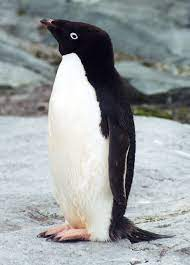

Chinstrap


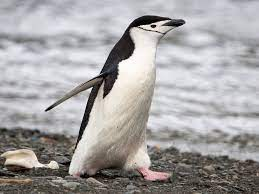

Gentoo


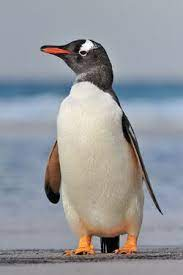

In [1]:
from google.colab import files
uploaded = files.upload()

Saving penguins_lter.csv to penguins_lter.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("penguins_lter.csv")
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343
studyName,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,PAL0708,...,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910,PAL0910
Sample Number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124
Species,Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),...,Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pyg

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [5]:
set(df['Comments'])
set(df['Region'])
set(df['Stage'])
set(df['Individual ID'])
set(df['Date Egg'])

{'2007-11-09',
 '2007-11-10',
 '2007-11-11',
 '2007-11-12',
 '2007-11-13',
 '2007-11-15',
 '2007-11-16',
 '2007-11-18',
 '2007-11-19',
 '2007-11-21',
 '2007-11-22',
 '2007-11-26',
 '2007-11-27',
 '2007-11-28',
 '2007-11-29',
 '2007-11-30',
 '2007-12-03',
 '2008-11-02',
 '2008-11-03',
 '2008-11-04',
 '2008-11-05',
 '2008-11-06',
 '2008-11-07',
 '2008-11-08',
 '2008-11-09',
 '2008-11-10',
 '2008-11-11',
 '2008-11-13',
 '2008-11-14',
 '2008-11-15',
 '2008-11-17',
 '2008-11-24',
 '2008-11-25',
 '2009-11-09',
 '2009-11-10',
 '2009-11-12',
 '2009-11-13',
 '2009-11-14',
 '2009-11-15',
 '2009-11-16',
 '2009-11-17',
 '2009-11-18',
 '2009-11-19',
 '2009-11-20',
 '2009-11-21',
 '2009-11-22',
 '2009-11-23',
 '2009-11-25',
 '2009-11-27',
 '2009-12-01'}

## Data Handling

In [6]:
df.corr()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Sample Number,1.000000,-0.236356,-0.022352,0.040849,-0.007042,0.006952,-0.488690
Culmen Length (mm),-0.236356,1.000000,-0.235053,0.656181,0.595110,-0.059759,0.189025
Culmen Depth (mm),-0.022352,-0.235053,1.000000,-0.583851,-0.471916,0.605874,0.429933
Flipper Length (mm),0.040849,0.656181,-0.583851,1.000000,0.871202,-0.507787,-0.376223
Body Mass (g),-0.007042,0.595110,-0.471916,0.871202,1.000000,-0.537888,-0.374638
Delta 15 N (o/oo),0.006952,-0.059759,0.605874,-0.507787,-0.537888,1.000000,0.570615
Delta 13 C (o/oo),-0.488690,0.189025,0.429933,-0.376223,-0.374638,0.570615,1.000000


In [7]:
df.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [8]:
# 필요없는 데이터 삭제
df_clean = df.drop(columns = ['studyName', 'Sample Number', 'Region', 'Stage', 'Individual ID', 'Date Egg', 'Comments'], axis = 1)
df_clean.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343
Species,Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),...,Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua)
Island,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Dream,Dream,Dream,Dream,Dream,Dream,Dream,Dream,Dream,Dream,...,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe
Clutch Completion,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,

In [9]:
# id컬럼 넣기
#df_clean.reset_index()
#df_clean['id'] = df_clean.index
#df_clean = df_clean[['id']+[col for col in df_clean.columns if col != 'id']]
#df_clean.T

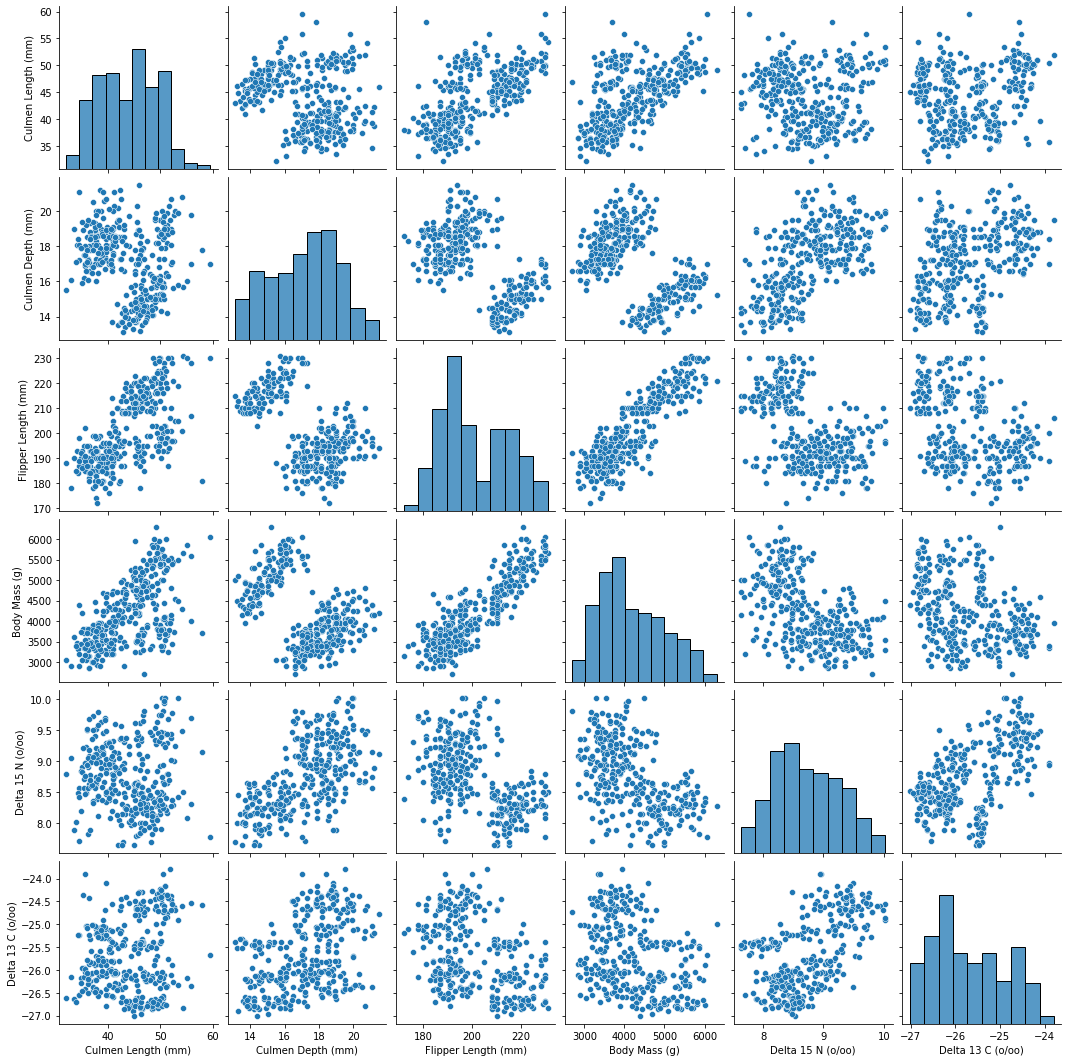

In [10]:
sns.pairplot(df_clean)

### 결측치 확인

In [11]:
# 결측치를 찾아내는 함수 정의
def check_missing(df_clean):
  missing = [] # 결측치가 있는 컬럼 개수를 저장하는 리스트
  count_missing = 0 # 결측치의 개수를 count하는 변수
  for i, col in enumerate(df_clean.columns): # 컬럼의 개수만큼 반복하면서 어느 컬럼인지 확인
    missing_values = sum(df_clean[col].isna()) # 결측값 합계를 missing_values변수에 저장
    is_missing = True if missing_values >= 1 else False # is_missing으로 결측값이 있다면 새로운 루프로 이동할수 있게 boolean형태로 설정
    if is_missing: # 결측값이 있다면
      count_missing += 1 # 결측값 1개당 +1을 해준다
      print(f'결측치가 있는 컬럼은: {col}입니다')
      print(f'{col}컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
      missing.append([col, df_clean[col].dtype]) # missing리스트에 [결측값이 있는 컬럼명, 컬럼 타입]을 저장
  if count_missing == 0:
    print('결측치가 존재하지 않습니다.')
  return missing

missing = check_missing(df_clean)
missing

결측치가 있는 컬럼은: Culmen Length (mm)입니다
Culmen Length (mm)컬럼에 총 2개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Culmen Depth (mm)입니다
Culmen Depth (mm)컬럼에 총 2개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Flipper Length (mm)입니다
Flipper Length (mm)컬럼에 총 2개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Body Mass (g)입니다
Body Mass (g)컬럼에 총 2개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Sex입니다
Sex컬럼에 총 10개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 15 N (o/oo)입니다
Delta 15 N (o/oo)컬럼에 총 14개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 13 C (o/oo)입니다
Delta 13 C (o/oo)컬럼에 총 13개의 결측치가 존재합니다.


[['Culmen Length (mm)', dtype('float64')],
 ['Culmen Depth (mm)', dtype('float64')],
 ['Flipper Length (mm)', dtype('float64')],
 ['Body Mass (g)', dtype('float64')],
 ['Sex', dtype('O')],
 ['Delta 15 N (o/oo)', dtype('float64')],
 ['Delta 13 C (o/oo)', dtype('float64')]]

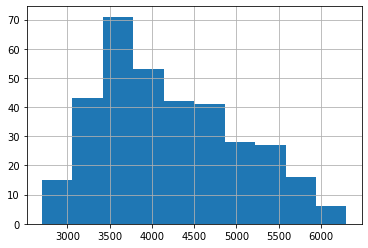

In [12]:
df_clean['Body Mass (g)'].hist()

In [13]:
countinuous_feature = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
discrete_feature = ['Species', 'Island', 'Clutch Completion', 'Sex']

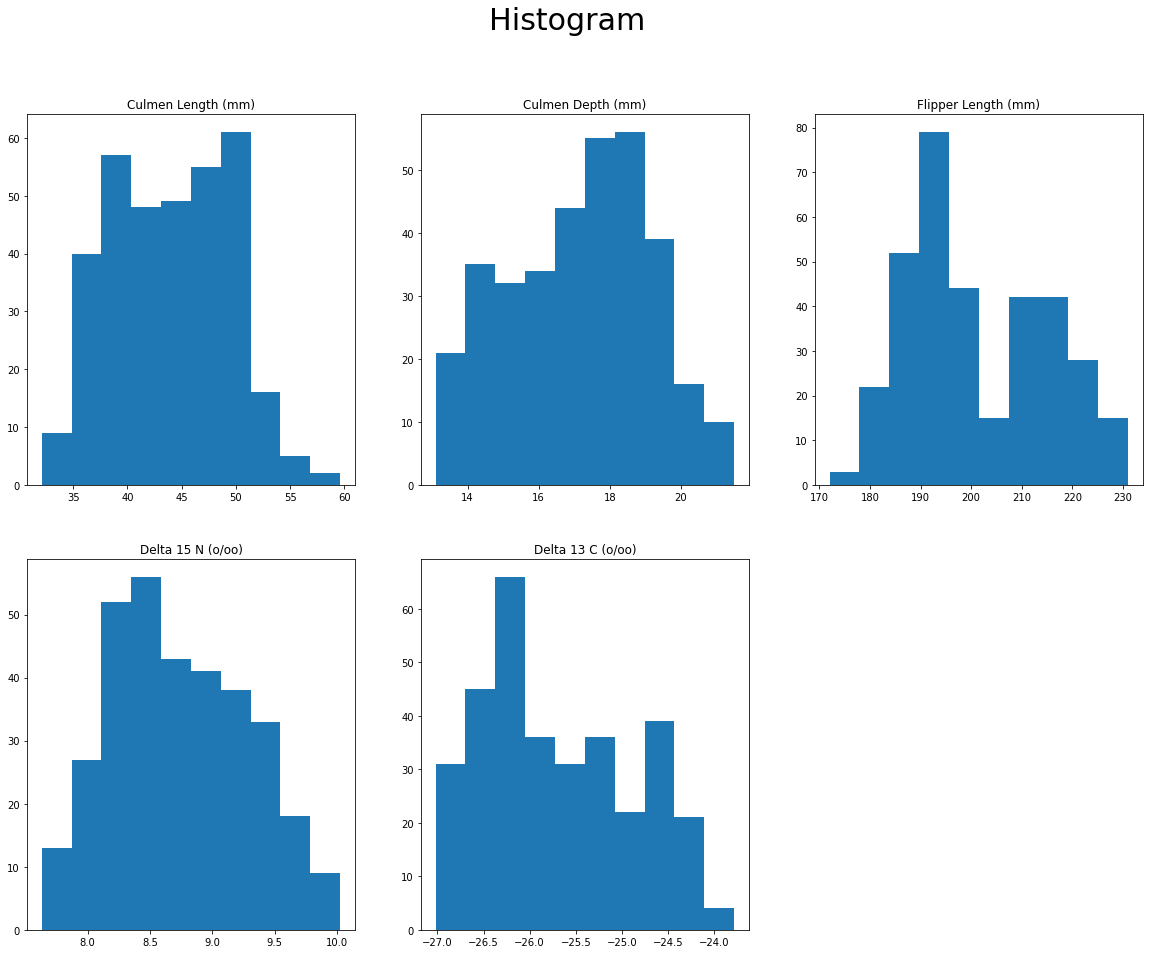

In [14]:
# 히스토그램으로 각 수치형 데이터를 살펴 봤을때 이상치를 발견하지 못하였다.
plt.figure(figsize = (20,15))
plt.suptitle("Histogram", fontsize = 30)

for i in range(len(countinuous_feature)):
  plt.subplot(2,3,i+1)
  plt.title(countinuous_feature[i])
  plt.hist(df_clean[countinuous_feature[i]])

### 결측치 처리
- 결측치들에 대해서 어떤 특별한 패턴이 없어 discrete형 데이터에 대해서는 행을 삭제하고, countinuous형 데이터는 평균값을 채운다

In [15]:
# 결측치가 있는 row확인
df_clean[df_clean.isna().sum(axis = 1) > 0].T

,0,3,8,9,10,11,12,13,15,39,41,46,47,212,246,250,286,324,339
Species,Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae),Chinstrap penguin (Pygoscelis antarctica),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua)
Island,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Dream,Dream,Dream,Dream,Dream,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe
Clutch Completion,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
Culmen Length (mm),39.1,NaN,34.1,42.0,37.8,37.8,41.1,38.6,36.6,39.8,40.8,41.1,37.5,51.9,44.5,47.3,46.2,47.3,NaN
Culmen Depth (mm),18.7,NaN,18.1,20.2,17.1,17.3,17.6,21.2,17.8,19.1,18.4,19.0,18.9,19.5,14.3,15.3,14.4,13.8,NaN
Flipper Length (mm),181.0,NaN,193.0,190.0,186.0,180.0,182.0,191.0,185.0,184.0,195.0,182.0,179.0,206.0,216.0,222.0,214.0,216.0,NaN
Body Mass (g),3750.0,NaN,3475.0,4250.0,3300.0,3700.0,3200.0,3800.0,3700.0,4650.0,3900.0,3425.0,2975.0,3950.0,4100.0,5250.0,4650.0,4725.0,NaN
Sex,MALE,NaN,NaN,NaN,NaN,NaN,FEMALE,MALE,FEMALE,MALE,MALE,MALE,NaN,MALE,NaN,MALE,NaN,NaN,NaN
Delta 15 N (o/oo),NaN,NaN,NaN,9.13362,8.63243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.96621,NaN,8.24253,8.25818,NaN
Delta 13 C (o/oo),NaN,NaN,NaN,-25.09368,-25.21315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-23.78767,-25.69327,NaN,-26.8154,-26.23886,NaN


In [16]:
# 결측치를 처리하는 함수 정의
def handle_na(data, missing):
  temp = data.copy() # 얕은 사본을 반환
  for col, dtype in missing: # missing 데이터에서 컬럼과 타입을 가져와서 비교
    if dtype == 'O': # 카테고리형은 해당 행들을 삭제
      temp = temp.dropna(subset = [col])
    elif dtype == int or dtype == float: # 수치형 데이터들은 평균값으로 교체
      temp.loc[:,col] = temp[col].fillna(temp[col].mean())
  return temp

data = handle_na(df_clean, missing)
# 결측치 처리가 잘 되었는지 확인
missing = check_missing(data)

결측치가 존재하지 않습니다.


In [17]:
data.corr()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Culmen Length (mm),1.000000,-0.228640,0.652126,0.589066,-0.056463,0.194850
Culmen Depth (mm),-0.228640,1.000000,-0.578730,-0.472987,0.591584,0.419777
Flipper Length (mm),0.652126,-0.578730,1.000000,0.873211,-0.494884,-0.364429
Body Mass (g),0.589066,-0.472987,0.873211,1.000000,-0.536397,-0.368914
Delta 15 N (o/oo),-0.056463,0.591584,-0.494884,-0.536397,1.000000,0.565070
Delta 13 C (o/oo),0.194850,0.419777,-0.364429,-0.368914,0.565070,1.000000


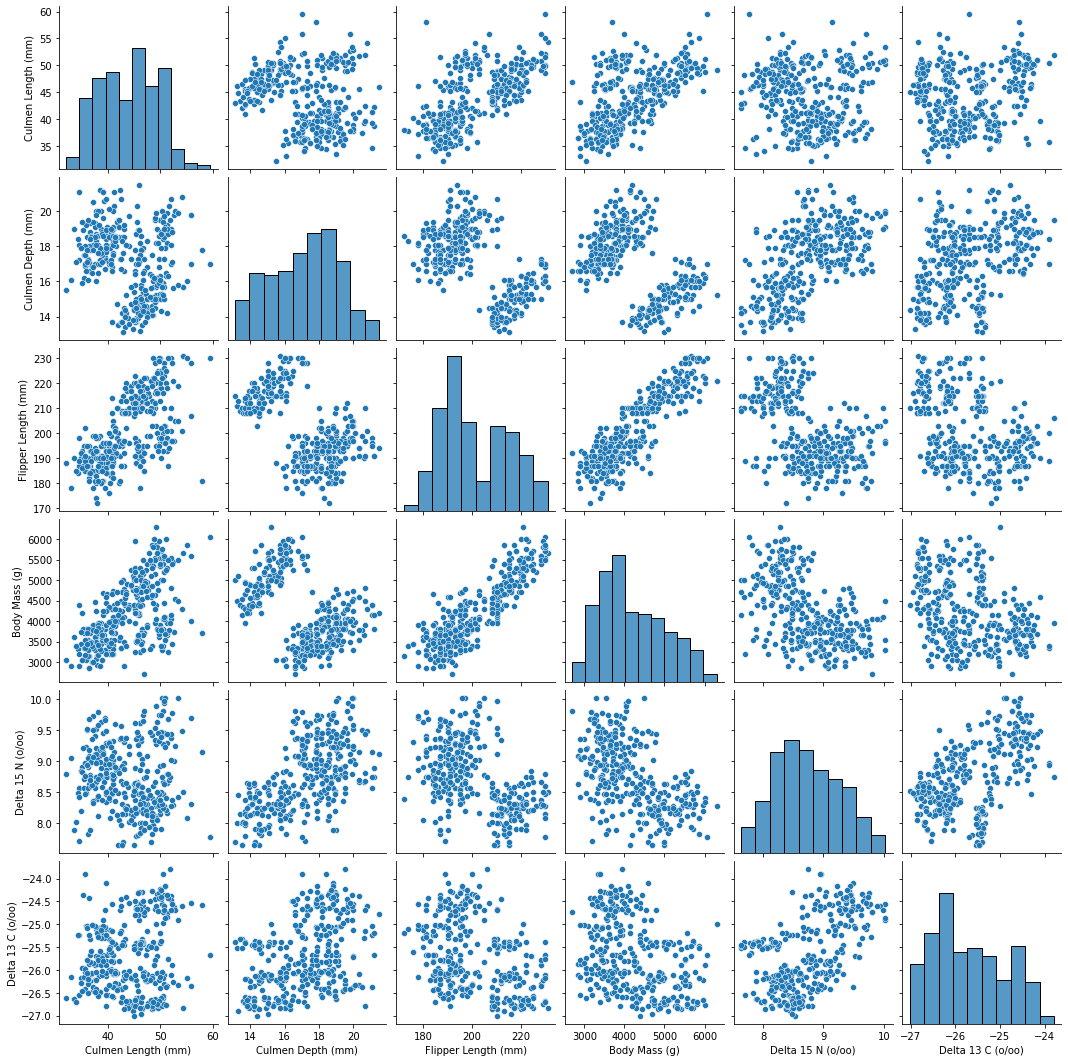

In [18]:
# 앞서 df_clean의 그래프와 큰 이변은 없어 보인다
sns.pairplot(data)

### Column 처리
- descrete형 컬럼의 데이터를 확인하고 이상치가 있나 확인한다
- label데이터와 상관관계가 적은 데이터를 확인한다


In [19]:
set(data['Clutch Completion'])

{'No', 'Yes'}

In [20]:
mapper = {'No':0,
          'Yes':1}
data['Clutch Completion'] = data['Clutch Completion'].map(mapper)

In [21]:
set(data['Sex'])

{'.', 'FEMALE', 'MALE'}

In [22]:
# 이상치 제거
temp = data[data['Sex']=='.'].index
data.drop(temp, inplace = True)
data['Sex'].value_counts()

MALE      168
FEMALE    165
Name: Sex, dtype: int64

In [23]:
mapper = {'FEMALE':0,
          'MALE':1}
data['Sex'] = data['Sex'].map(mapper)


In [24]:
data.corr()

,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
Clutch Completion,1.000000,-0.036316,-0.091279,0.112538,0.131188,0.012880,-0.170631,-0.147773
Culmen Length (mm),-0.036316,1.000000,-0.228626,0.653096,0.589451,0.344078,-0.056245,0.195149
Culmen Depth (mm),-0.091279,-0.228626,1.000000,-0.577792,-0.472016,0.372673,0.590670,0.418959
Flipper Length (mm),0.112538,0.653096,-0.577792,1.000000,0.872979,0.255169,-0.492672,-0.363177
Body Mass (g),0.131188,0.589451,-0.472016,0.872979,1.000000,0.424987,-0.535080,-0.367933
Sex,0.012880,0.344078,0.372673,0.255169,0.424987,1.000000,0.116352,-0.001983
Delta 15 N (o/oo),-0.170631,-0.056245,0.590670,-0.492672,-0.535080,0.116352,1.000000,0.564354
Delta 13 C (o/oo),-0.147773,0.195149,0.418959,-0.363177,-0.367933,-0.001983,0.564354,1.000000


In [25]:
# Species Data 이름 짧게 변경
data['Species'] = data['Species'].apply(lambda x:x.split()[0])

### 연속형 데이터와 이산형 데이터 관찰

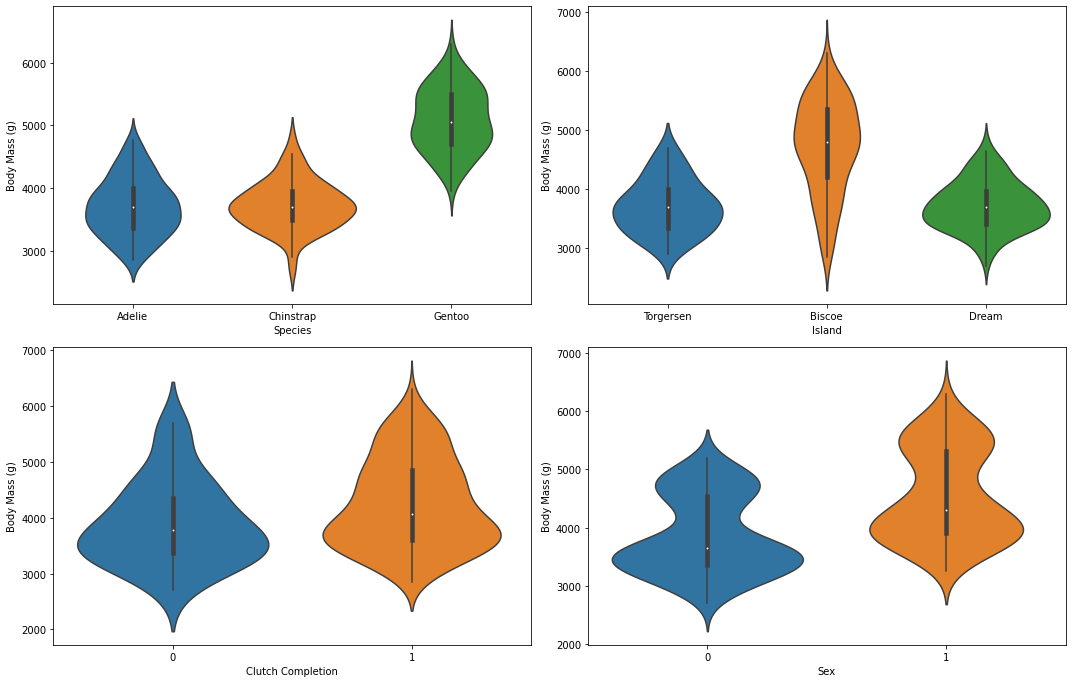

In [26]:
from IPython.core.pylabtools import figsize
plt.figure(figsize(15,10))

for i in range(len(discrete_feature)):
  plt.subplot(2,2,i+1)
  plt.xlabel(discrete_feature[i])
  plt.ylabel('Body Mass (g)')
  sns.violinplot(x = data[discrete_feature[i]], y = data['Body Mass (g)'])
plt.tight_layout(rect = [0, 0.04, 1, 1])
plt.show()

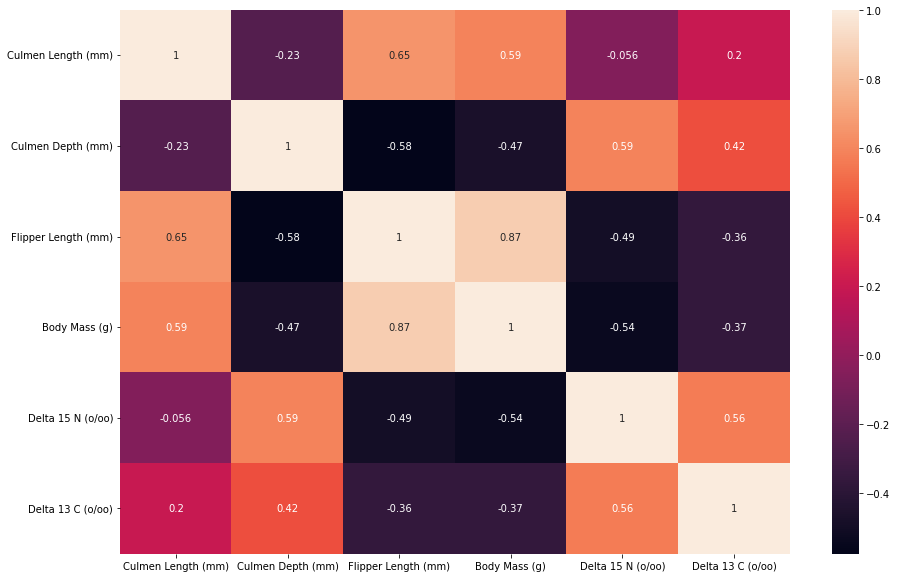

In [27]:
plt.figure(figsize = (15,10))
sns.heatmap(data.drop(discrete_feature,axis = 1).corr(),annot = True)
plt.show()

모든 연속형 데이터와 이산형 데이터 변수가 label(Body Mass)와 관계가 있어 모든 데이터를 사용하는 방향으로 생각합니다

## Visualization

### Species 시각화

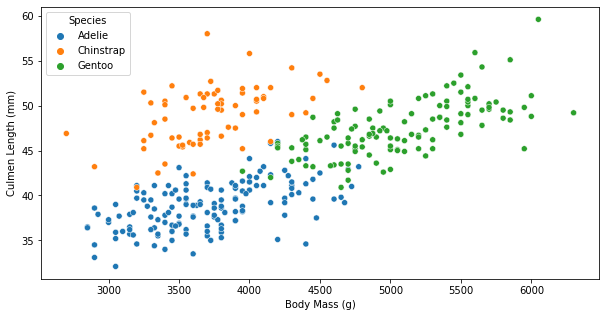

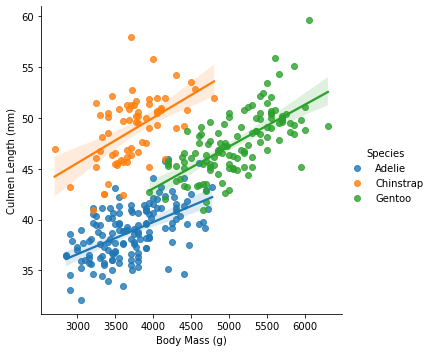

In [28]:
plt.figure(figsize = (10,5))
sns.scatterplot(data=data, x = 'Body Mass (g)', y = 'Culmen Length (mm)', hue = 'Species')
sns.lmplot(data = data, x = 'Body Mass (g)', y = 'Culmen Length (mm)', hue = 'Species')
# Adelie종과 Chinstrap종은 무게가 비슷한 범위에서 나타나는 걸 볼수 있다.
# 옆모습 기준 부리의 분포가 밀집되어있는 Gentoo종과 Adelie종만 관계가 있는것으로 보인다
# 펭귄 무게에 영향력이 클 것으로 보인다

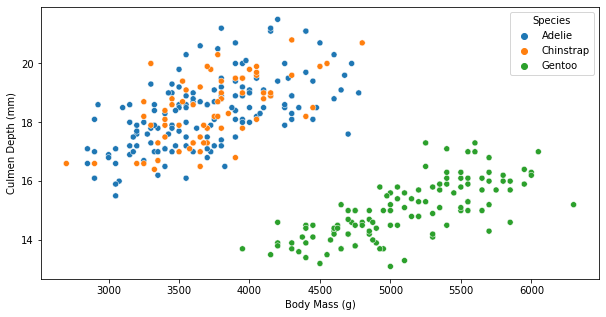

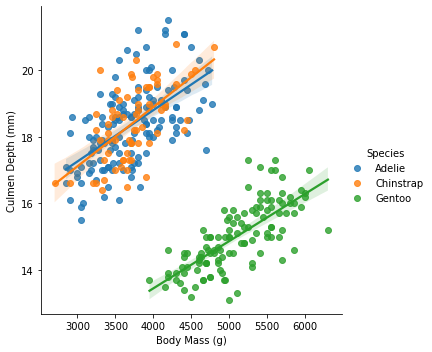

In [29]:
plt.figure(figsize = (10,5))
sns.scatterplot(data=data, x = 'Body Mass (g)', y = 'Culmen Depth (mm)', hue = 'Species')
sns.lmplot(data = data, x = 'Body Mass (g)', y = 'Culmen Depth (mm)', hue = 'Species')
# 옆 모습 기준 부리의 세로 길이는 Gentoo종에 무게와 관계가 있어보인다

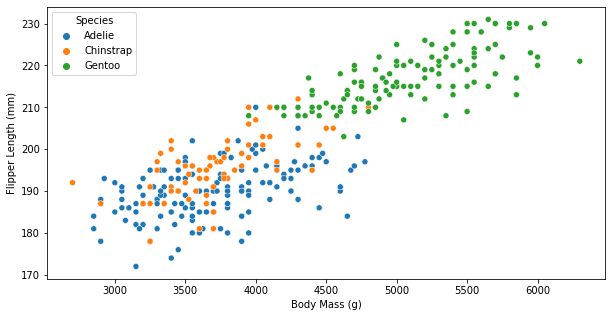

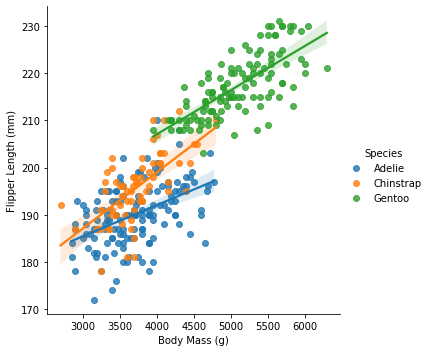

In [30]:
plt.figure(figsize = (10,5))
sns.scatterplot(data=data, x = 'Body Mass (g)', y = 'Flipper Length (mm)', hue = 'Species')
sns.lmplot(data = data, x = 'Body Mass (g)', y = 'Flipper Length (mm)', hue = 'Species')
# 펭귄의 팔(날개) 길이가 펭귄 무게에 큰 영향을 끼치는 것 같아 보인다 (종류와 무관하게)

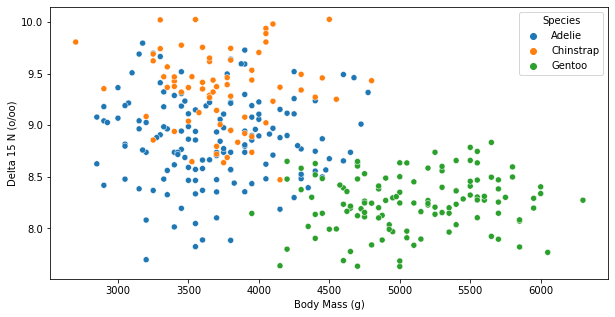

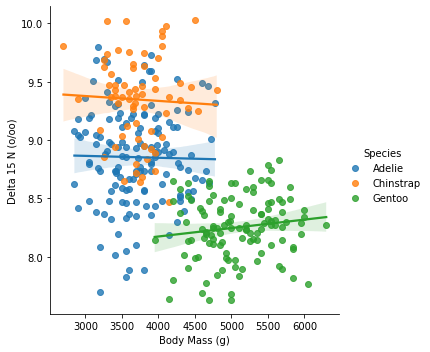

In [31]:
plt.figure(figsize = (10,5))
sns.scatterplot(data=data, x = 'Body Mass (g)', y = 'Delta 15 N (o/oo)', hue = 'Species')
sns.lmplot(data = data, x = 'Body Mass (g)', y = 'Delta 15 N (o/oo)', hue = 'Species')
# 토양에 따라 변화하는 안전 동위원소 15N:14N의 비율은 펭귄 무게에 영향력이 적을 것으로 보인다

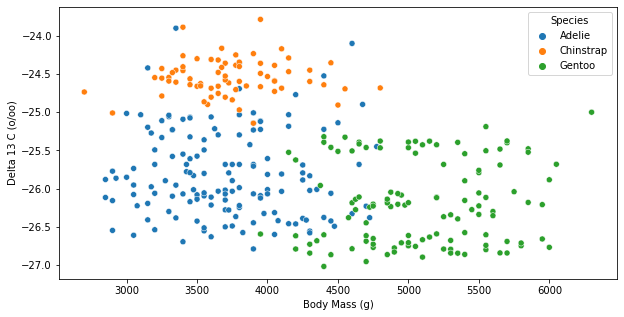

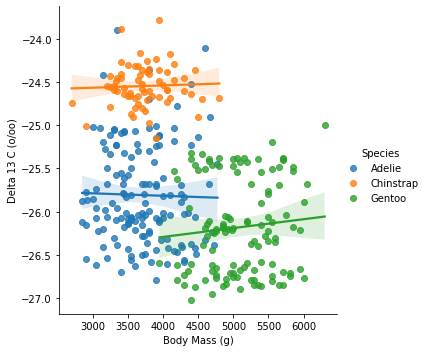

In [32]:
plt.figure(figsize = (10,5))
sns.scatterplot(data=data, x = 'Body Mass (g)', y = 'Delta 13 C (o/oo)', hue = 'Species')
sns.lmplot(data = data, x = 'Body Mass (g)', y = 'Delta 13 C (o/oo)', hue = 'Species')
# 먹이에 따라 변화하는 안전 동위원소 13C:12C의 비율은 펭귄 무게에 영향력이 적을 것으로 보인다

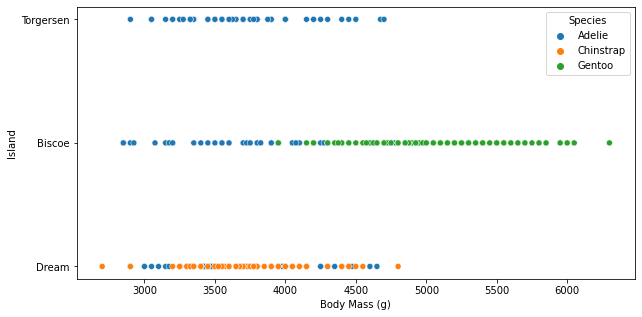

In [33]:
plt.figure(figsize = (10,5))
sns.scatterplot(data=data, x = 'Body Mass (g)', y = 'Island', hue = 'Species')
# 수집된 Palmer Station 근처 섬정보는 펭귄 무게에 영향력이 적을 것으로 보인다

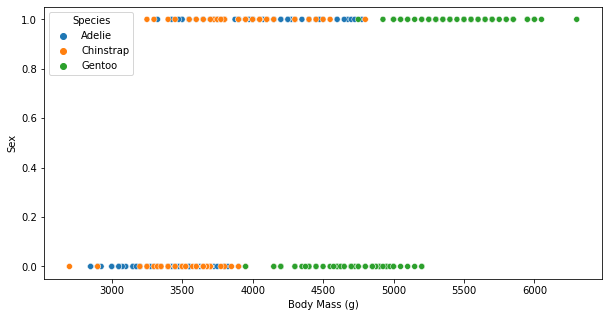

In [34]:
plt.figure(figsize = (10,5))
sns.scatterplot(data=data, x = 'Body Mass (g)', y = 'Sex', hue = 'Species')
# 펭귄의 성별은 0이 암컷, 1이 수컷을 나타내며 그래프에선 수컷의 무게가 평균적으로 무거운것을 볼수 있다.

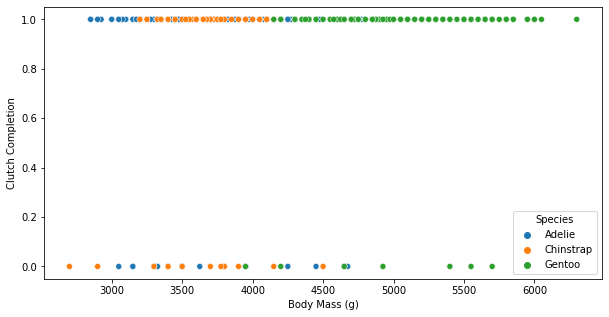

In [35]:
plt.figure(figsize = (10,5))
sns.scatterplot(data=data, x = 'Body Mass (g)', y = 'Clutch Completion', hue = 'Species')
# 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기한 정보는 펭귄 무게에 영향력이 적을 것으로 보인다

In [36]:
data['Clutch Completion'].value_counts()

1    298
0     35
Name: Clutch Completion, dtype: int64

# Data Preparation
- 데이터를 분석 모형에 넣어 학습을 진행하기 위한 준비과정
- train, test split사용해 row분리
- features, label분리

- 위 그래프 비교를 통해 비교적 영향력이 있는 데이터에 대해 확인해 보았다

## one-hot encoding(이산데이터 처리)

In [37]:
# 이산형 변수는 모두 get_dimmies()함수를 사용해 원-핫 인코딩 처리합니다
data.fillna(data.mean(), inplace = True)
data = pd.get_dummies(data).reset_index()
data.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Index(['index', 'Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)',
       'Delta 13 C (o/oo)', 'Species_Adelie', 'Species_Chinstrap',
       'Species_Gentoo', 'Island_Biscoe', 'Island_Dream', 'Island_Torgersen'],
      dtype='object')

In [38]:
check_missing(data)
data

결측치가 존재하지 않습니다.


,index,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species_Adelie,Species_Chinstrap,Species_Gentoo,Island_Biscoe,Island_Dream,Island_Torgersen
0,0,1,39.1,18.7,181.0,3750.0,1,8.737794,-25.684381,1,0,0,0,0,1
1,1,1,39.5,17.4,186.0,3800.0,0,8.949560,-24.694540,1,0,0,0,0,1
2,2,1,40.3,18.0,195.0,3250.0,0,8.368210,-25.333020,1,0,0,0,0,1
3,4,1,36.7,19.3,193.0,3450.0,0,8.766510,-25.324260,1,0,0,0,0,1
4,5,1,39.3,20.6,190.0,3650.0,1,8.664960,-25.298050,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,338,0,47.2,13.7,214.0,4925.0,0,7.991840,-26.205380,0,0,1,1,0,0
329,340,1,46.8,14.3,215.0,4850.0,0,8.411510,-26.138320,0,0,1,1,0,0
330,341,1,50.4,15.7,222.0,5750.0,1,8.301660,-26.041170,0,0,1,1,0,0
331,342,1,45.2,14.8,212.0,5200.0,0,8.242460,-26.119690,0,0,1,1,0,0


## Scaling
- 각각의 단위가 달라 학습 단계에서 미치는 영향이 클 수 있어, 이 영향을 최소화 하기 위해 scaling을 한다
- 이상치에 미치는 스케이링 영향도 : min-max > standard > robust(StandardScaler)

In [39]:
# StandardScaler는 평균 0, 분산1이 되도록 값을 바꿔준다
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaler = scaler.fit_transform(data[countinuous_feature])
data[countinuous_feature] = pd.DataFrame(data = data_scaler, columns = countinuous_feature)

data[countinuous_feature].tail()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo)
328,0.587352,-1.762145,0.931283,-1.375792,-0.664937
329,0.514098,-1.457000,1.002739,-0.603943,-0.579596
330,1.173384,-0.744994,1.502928,-0.805977,-0.455963
331,0.221082,-1.202712,0.788372,-0.914856,-0.555887
332,1.081817,-0.541564,0.859828,-0.691506,-0.601218


In [40]:
check_missing(data)
data = data.drop(['index'],axis = 1)
data.info()

결측치가 존재하지 않습니다.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Clutch Completion    333 non-null    int64  
 1   Culmen Length (mm)   333 non-null    float64
 2   Culmen Depth (mm)    333 non-null    float64
 3   Flipper Length (mm)  333 non-null    float64
 4   Body Mass (g)        333 non-null    float64
 5   Sex                  333 non-null    int64  
 6   Delta 15 N (o/oo)    333 non-null    float64
 7   Delta 13 C (o/oo)    333 non-null    float64
 8   Species_Adelie       333 non-null    uint8  
 9   Species_Chinstrap    333 non-null    uint8  
 10  Species_Gentoo       333 non-null    uint8  
 11  Island_Biscoe        333 non-null    uint8  
 12  Island_Dream         333 non-null    uint8  
 13  Island_Torgersen     333 non-null    uint8  
dtypes: float64(6), int64(2), uint8(6)
memory usage: 22.9 KB


In [55]:
features = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
label = ['Body Mass (g)']

X,y = data[features], data[label]

In [ ]:
,
       'Species_Adelie', 'Species_Chinstrap', 'Species_Gentoo',
       'Island_Biscoe', 'Island_Dream', 'Island_Torgersen',
       'Clutch Completion'

## train, test split


In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']], y['Body Mass (g)'], test_size = 0.2, random_state = 11)

In [63]:
check_missing(X_train)

결측치가 존재하지 않습니다.


[]

# 학습

In [64]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
  model = Ridge(alpha = alpha)

  neg_mse_scores = cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
  avg_rmse = np.mean(np.sqrt(-neg_mse_scores))
  print('alpha 값 ', alpha, '일때 평균 rmse :', np.round(avg_rmse,4))

alpha 값  0 일때 평균 rmse : 370.681
alpha 값  0.1 일때 평균 rmse : 370.6721
alpha 값  1 일때 평균 rmse : 370.6202
alpha 값  10 일때 평균 rmse : 371.9618
alpha 값  100 일때 평균 rmse : 409.6828


In [65]:
model

Ridge(alpha=100)

In [71]:
ridge = Ridge(alpha = 10)
ridge.fit(X_train,y_train)
pred= ridge.predict(X_test)
print(ridge.score(X_test,y_test))

0.8128453958846416


In [72]:
import numpy as np

def RMSE(true, pred):
    score = np.sqrt(np.mean(np.square(true-pred)))
    return score

RMSE(y_test,pred)

379.6804595207892